##**Statistics**
It is a branch of mathematics that deals with collection, presentation, organization and analysis of data. ---> We can extract some meaningful insights (Information) --> It help us to make proper decision

**Stats is divided into Two parts**
###**1. Descriptive Stats**
A branch of stats where we deal with collection and distribution of data. It is further divided into two parts.
1. Measure of Central Tendency --> Center of the data
2. Measure of dispersion -> How data is spreaded all around

###**2. Inferential Stats**
A branch of stats that deals with making predictions and drawing conclusion out of the sample data. It also have further two types
1. Hypothesis testing: We claim whether the statement is true or false
    * null Hypo
    * Alternate Hypo
2. Regression Analysis:
    * Dependent Variable
    * Independent Variable

###**Measure of central tendency**
**Mean** -> Average of data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
a = df.shape
print(f'The number of rows: {a[0]} and columns are {a[1]}')

The number of rows: 398 and columns are 9


In [5]:
df['weight'].mean()

np.float64(2970.424623115578)

On an average in our dataset, the car's weight is 2970

**Median** -> Middle value of any sorted data (Either in ascending or descending)

In [6]:
df['horsepower'].median()

93.5

**Mode** -> The value that is having the highest frequency, or Count. (Most common value)

In [7]:
df['origin'].nunique()

3

In [8]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [9]:
df['origin'].mode()

,origin
0,usa


In [10]:
df['origin'].value_counts()

,count
origin,
usa,249
japan,79
europe,70


**These central tendencies are used to impute the null values with some data**
* Mean and Median -> Numerical Columns
* Mode -> Object, categorical Data

###**Measure of dispersion**
**Range** - The difference between maximum value - minimum value

In [11]:
df['mpg']

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [12]:
range = max(df['mpg']) - min(df['mpg'])
range

37.6

In [13]:
np.ptp(df['mpg']) # built in numpy method (Peak to Peak)

np.float64(37.6)

**Variance** ->It Quantifies the spread of data around the mean
* The average of squared difference of data point from the mean value

`sum of squared difference between mean and data input / total number of data points`

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
df.acceleration

,acceleration
0,12.0
1,11.5
2,11.0
3,12.0
4,10.5
...,...
393,15.6
394,24.6
395,11.6
396,18.6


In [16]:
np.var(df.acceleration) # It means that the 7.60 value is varying from the mean of my data
# Since we were doing square to the differences, so it is not in the same unit as acceleration

7.585740574732961

In [17]:
np.sqrt(np.var(df.acceleration) ) # This is the actual deviation from the mean value in the same unit

np.float64(2.7542223175940177)

**Standard Deviation** - It shows how much the individual data points are deviated from the mean value (in the same unit)
* it is just a squareroot of variance

In [18]:
np.std(df.acceleration)

2.7542223175940177

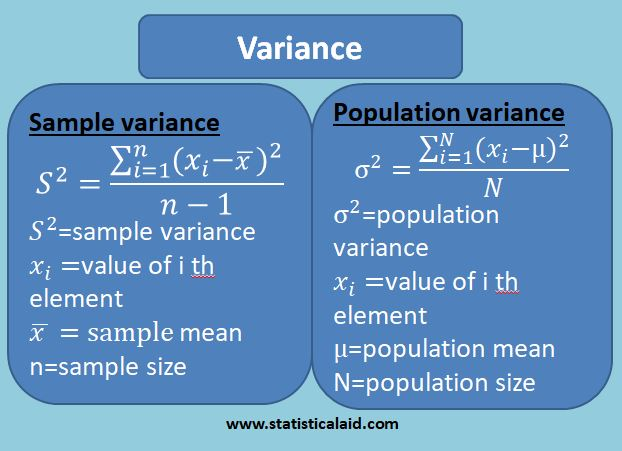

**Percentile** -> Out of total (poplulation) Shikha score 99 percentile

The score that shikha score is higher than 99% if the people who attempted the exam

In [19]:
data = [10,30,40,45,50,28,22,21,18,13,66,65,70,72,21] # 100 marks
np.percentile(data,99.99999999999999)

np.float64(72.0)

In [20]:
np.percentile(data,70)

np.float64(48.99999999999999)

There are three fixed percentile values
* Quartile 1 -> 25th Percentile
* Quartile 2 -> 50th Percentile (median Value)
* Quartile 3 -> 75th Percentile

In [21]:
np.percentile(data,50)

np.float64(30.0)

In [22]:
np.median(data)

np.float64(30.0)

**Inter Quartile Range(IQR)**

IQR = Q3 - Q1

**Outlier**

very high or very low (extreme values) that differ from the normal range of data

In [23]:
data = [18,20,25,26,30,33,31,32,25,28,41,44,48,45,46,55,52,140,-30]
len(data)

19

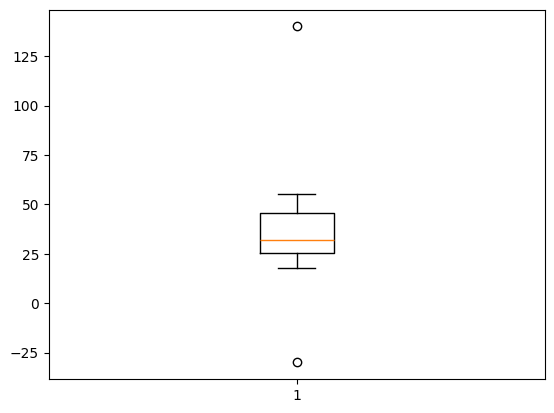

In [24]:
plt.boxplot(data)
plt.show()

**Steps to remove the outliers**
* Find IQR
* Then find UF and LF and then limit the data

In [25]:
data = [18,20,25,26,30,33,31,32,25,28,41,44,48,45,46,55,52,140,-30]

In [26]:
Q1 = np.percentile(data,25)
Q3 = np.percentile(data,75)
IQR = Q3 - Q1
IQR

np.float64(20.0)

In [27]:
UF = Q3 + (1.5*IQR)
LF = Q1 - (1.5*IQR)
UF,LF

(np.float64(75.5), np.float64(-4.5))

In [28]:
x = data.copy()
for i in x:
  if i >=UF or i<=LF:
    print(f'Outlier value is {i} and has been removed')
    data.remove(i)

Outlier value is 140 and has been removed
Outlier value is -30 and has been removed


In [29]:
data

[18, 20, 25, 26, 30, 33, 31, 32, 25, 28, 41, 44, 48, 45, 46, 55, 52]

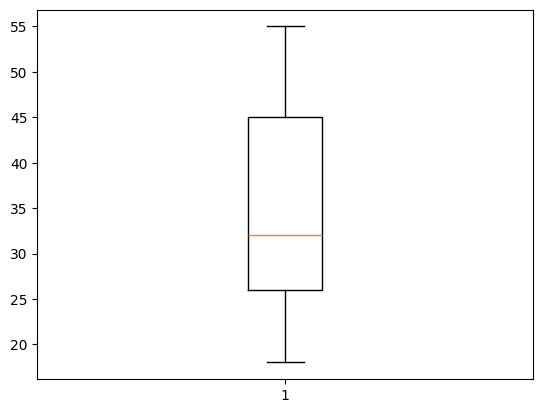

In [30]:
plt.boxplot(data)
plt.show()

###**Correlation**
Relation between two elements, features to get to know about the dependent and independent variable
* Range of Corr varies from -1 to + 1
* Positive Corr: 0 to +1
* Negative Corr: -1 to 0
* no corr: 0

correlation will work only on numerical data

In [31]:
titanic = sns.load_dataset('titanic')

In [32]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [34]:
corrMat = titanic.corr(numeric_only=True)

In [35]:
corrMat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


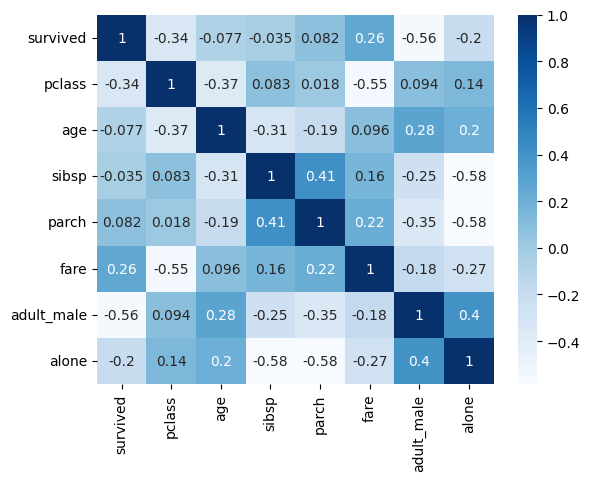

In [36]:
sns.heatmap(corrMat, annot = True, cmap ='Blues')
plt.show()

**Insights**
* Adult male were having negative relation with survival (-0.56) -> Most of the adults died during this event

In [37]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**To plot distribution graph (Histogram or KDE plot)**

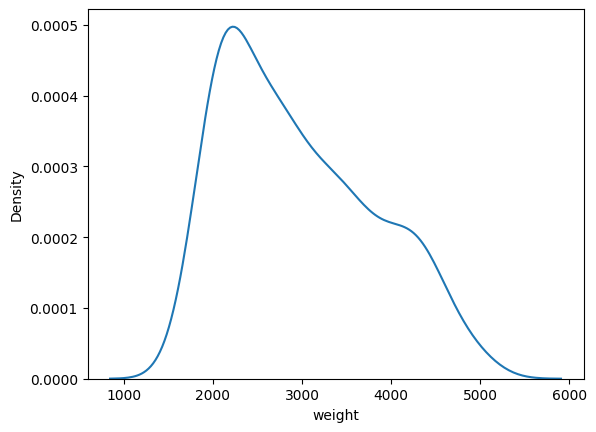

In [38]:
sns.kdeplot(df['weight'])
plt.show()

In [39]:
from scipy.stats import skew
df['weight'].skew() # +0.53 ---> Right skew

np.float64(0.5310625125994629)

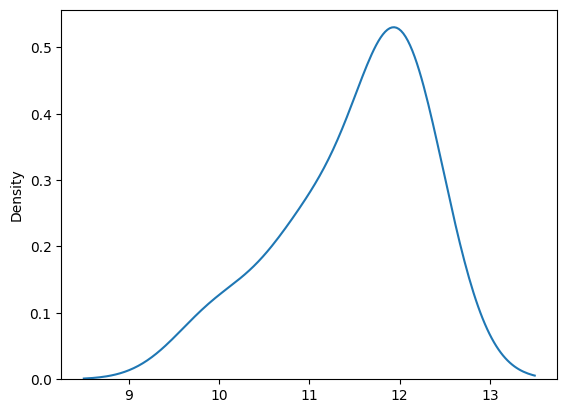

In [40]:
data = [10,11,11,12,12,12,12,12]
sns.kdeplot(data)
plt.show()

In [41]:
skew(data) # -1.06 ----> Left

np.float64(-1.0606601717798212)

In [42]:
# loc -> mean
# scale -> STD
data = np.random.normal(loc=0,scale = 1,size = 10000)
data

array([-0.35248526,  1.43921889,  0.72709758, ...,  0.89615906,
       -0.30242501, -0.49041974])

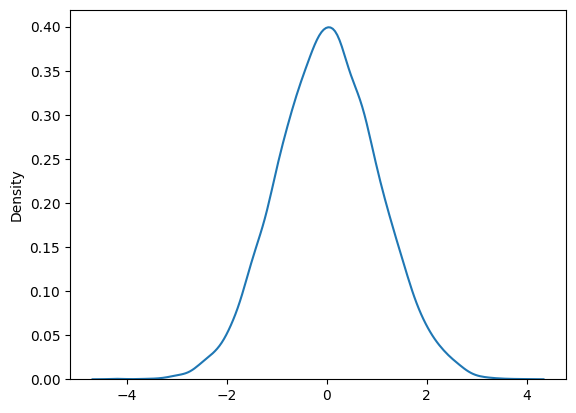

In [43]:
sns.kdeplot(data)
plt.show()

In [44]:
skew(data) # Nearly zero

np.float64(0.01288980114830225)

In [45]:
np.mean(data) # approx 0

np.float64(0.022617340443084225)

In [46]:
np.std(data) # Approx 1

np.float64(1.0069501055399113)

**Kurtosis**


In [47]:
from scipy.stats import kurtosis

In [48]:
kurtosis(df['weight']) # Platykurtois

np.float64(-0.7907326965772179)

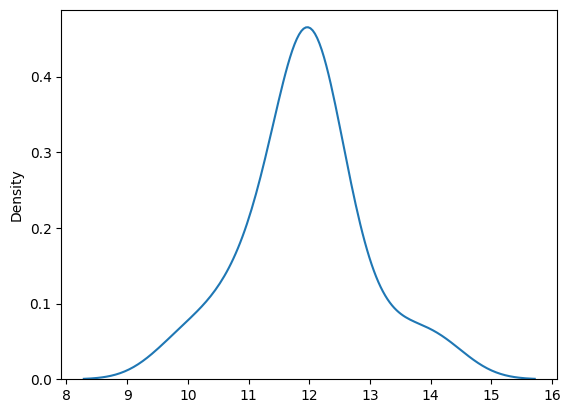

In [49]:
data = [10,11,11,12,12,12,12,12,12,12,12,13,14]
sns.kdeplot(data)
plt.show()

In [50]:
kurtosis(data) # +ve kurtosis --> Lepto kurtosis

np.float64(0.8223566752628435)

##**Inferential Stats**
It allow us to make conclusions about the population using sample data.
* Comparing the groups
* Check Relation
* Testing model assumption
* Making prediction

**Population:** The entire group that we want to study (All human on earth)

**Sample:** A small part of the population taken for study. (300 people in dataset)

###**Hypothesis**
Hypotheisis test is basically comparision between
1. Null Hypothesis: No difference between the original statement and the observed statement
2. Alternate Hypothesis: Difference betwween the original statement and observe statemenet is identifiable

**Every test evaluates evidence against the null hypothesis**

###**Statistical Testing**
It tells you the observation based on given sample data and ouput.
* example: T,F,Chi2,Z

---

**P value**

A probablitic value we recieve during the statistical testing as a result
* small p-value(<=0.05) -> Reject my null hypothesis
* large p-value(>0.05) -> accepts the null hypothesis


**Degree of freedom**

It adjusts for the sample size in the test
* Number of observation --> number of parameter
* smaller the dof will be ---> wider the unertainity will be

**Test**

###**One Sample t test**
It is being used when you want to check if your sample mean/proportion differ from a known population value

In [51]:
from scipy import stats

In [52]:
penguins = sns.load_dataset('penguins').dropna()

In [53]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [54]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


**Statement: Is the average height of penguins flipper length differ from 40 cm**

In [55]:
tstat, pvalue = stats.ttest_1samp(penguins['flipper_length_mm'],popmean=200)

In [56]:
pvalue

np.float64(0.2089240226905175)

In [57]:
if pvalue <=0.05:
  print('null hypothesis rejected')
else:
  print('null hypothesis accepted')

null hypothesis accepted


**The average height of penguins actually differ from 40 cm**

use it:
* Continouos variable
* when population mean is given

###**Two sample test**
It compare two groups (independent or paired)

**Statement**: Do Male and female penguins have different flipper length

In [58]:
male = penguins[penguins['sex'] == 'Male']['flipper_length_mm']
female = penguins[penguins['sex'] == 'Female']['flipper_length_mm']

In [59]:
male

,flipper_length_mm
0,181.0
5,190.0
7,195.0
13,191.0
14,198.0
...,...
333,230.0
335,230.0
337,222.0
341,222.0


In [60]:
female

,flipper_length_mm
1,186.0
2,195.0
4,193.0
6,181.0
12,182.0
...,...
332,213.0
334,217.0
338,214.0
340,215.0


For two sample ttest --> ttest_ind

In [61]:
t_test, pvalue = stats.ttest_ind(male,female,equal_var=False)

In [62]:
pvalue

np.float64(2.3356187645629936e-06)

In [63]:
if pvalue <=0.05:
  print('null hypothesis rejected')
else:
  print('null hypothesis accepted')

null hypothesis rejected


Male and female both are having same kind of flipper length

**Statement: The average body mass of male and female penguins are different**

In [64]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [65]:
male = penguins[penguins['sex'] == 'Male']['body_mass_g']
female = penguins[penguins['sex'] == 'Female']['body_mass_g']

In [66]:
male

,body_mass_g
0,3750.0
5,3650.0
7,4675.0
13,3800.0
14,4400.0
...,...
333,5500.0
335,5850.0
337,6000.0
341,5750.0


In [67]:
female

,body_mass_g
1,3800.0
2,3250.0
4,3450.0
6,3625.0
12,3200.0
...,...
332,4650.0
334,4375.0
338,4925.0
340,4850.0


In [68]:
np.var(male)

616666.6445223924

In [69]:
np.var(female)

441095.59228650125

In [70]:
t_test, pvalue = stats.ttest_ind(male,female,equal_var=False)

In [71]:
pvalue

np.float64(4.793891255051457e-16)

In [72]:
if pvalue <=0.05:
  print('null hypothesis rejected')
else:
  print('null hypothesis accepted')

null hypothesis rejected


###**F test**
it is used for comparing variance of two datasets (spread of data)

It is used for checking if two populations have the same variance before applying other test

for example:

In [73]:
A = [25,30,28,35,40]
B = [20,22,23,24,25]

In [74]:
varA , varB = np.var(A,ddof = 1), np.var(B,ddof=1)

In [75]:
from scipy.stats import f

In [76]:
f_stat = varA / varB
df1,df2 = len(A) - 1 , len(B) - 1

In [77]:
f_stat

np.float64(9.540540540540539)

In [78]:
pvalue = 1 - f.cdf(f_stat,df1,df2) # cumulative distribution function
pvalue

np.float64(0.025294155329658286)

In [79]:
if pvalue <=0.05:
  print('null hypothesis rejected')
else:
  print('null hypothesis accepted')

null hypothesis rejected


Variance are slightly different

**Chi2 Test**

It compares observer vs expected frequecy (**It is use to check association between the categories**)

**Chi2, anova, z test**

In [80]:
data = np.array([[30,10],[25,15]])

In [81]:
from scipy.stats import chi2_contingency

In [82]:
data

array([[30, 10],
       [25, 15]])

In [84]:
chi2, pValue, dof, expected_freq =  chi2_contingency(data)

In [85]:
expected_freq

array([[27.5, 12.5],
       [27.5, 12.5]])

In [86]:
pValue

np.float64(0.3346268097478841)

**Insight -> No Strong relation**
* just in case if p < 0.05 --> Col1 and Col2 are dependent (related)

**Anova Test -> Analysis of Variance**

It compares mean of 3 or more group so that we can check if all group have the same mean or not

In [87]:
A = [85.90,88,75,95]
B = [70,65,80,72,68]
C = [88,85,90,92,87]

from scipy.stats import f_oneway # one way anova

In [88]:
f_stat , p_value = f_oneway(A,B,C)

In [89]:
p_value

np.float64(0.001205900707644529)

Insight -> p < 0.05 --> At least one group mean in different from others

**Z test**

it is used to compare the sample mean vs population mean, when population variance is given and we have large sample data

In [90]:
from scipy.stats import norm

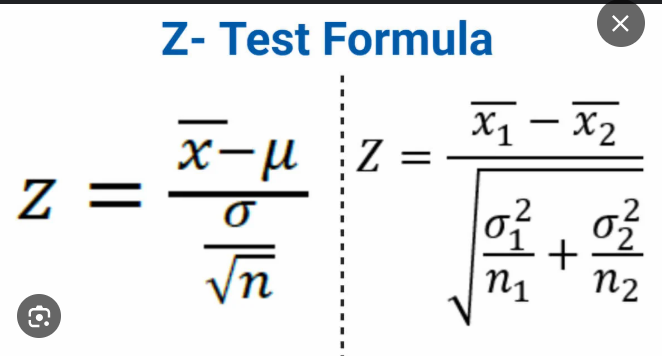

In [91]:
sample = [72,70,68,65,74,69]
mean_samp= np.mean(sample)
pop_mean = 70
pop_std = 3 # we are assuming
n = len(sample)

In [92]:
mean_samp

np.float64(69.66666666666667)

In [93]:
# Z test
z = (mean_samp - pop_mean) / (pop_std/np.sqrt(n))

In [94]:
z

np.float64(-0.2721655269759048)

In [95]:
pVal = 2 * (1-norm.cdf(abs(z)))

In [96]:
pVal

np.float64(0.7854947471183573)

**Insight -> Sample mean is not different from the population mean**